# NLP Group Project

In [1]:
#imports
import numpy as np
import pandas as pd
import prepare as pr
import explore as ex
#import modeling as mod
import warnings
warnings.filterwarnings('ignore')

# Project Description:
Github is an online version control system that stores your code history. Repsositories are made to store different files that are written in various programming languages and named; usually based on what is inside the repository. The format for the repository titles are user_name/title. A github search query was made for COVID-19 and repository file titles were scraped and stored in a .json file. Natural Language Processing was applied to the README files in each repository and words were analyzed. A machine learning algoritm was applied to the information obtained from the natural language processing statifying on programming language in order to predict primary programming language of repository.

# Project Goals:
* Explore words and frequencies of covid-19 README's.
* Develop a machine learning model to predict `language`
* Deliver a final report to stakeholders

In [2]:
#acquiring and preparing data
df=pd.read_json('data.json')

In [3]:
#a look at the data
df.head(3)

,repo,language,readme_contents
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,# Bayesian inference and forecast of COVID-19\...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,# COVID-19_TRACKER_HTML_CSS_JAVASCRIPT\nCOVID-...
2,joanby/covid19,HTML,


# Data Dictionary:

| Feature | Definition |
|:--------|:-----------|
|repo| The file path of the repository on github.|
|language| The programming language that the readme of the repository is written in.|
|readme_contents| The raw contents of the readme for the repository.|
|stemmed| The contents of the readme after they have been stemmed.|
|lemmatized| The contents of the readme after they have been lemmatized.|

#  Explore Preperation:
* Data was prepared for explore:
    * Removed blank README files:
        * 4 repos had README files but contained no contents ("") so they were removed
    * Data was:
        * stop words were removed
        * stemmed
        * lemmatized
        * tokenized
    * `language` was binned:
        * Took the top 5 languages and kept them unique and all other languages used less than them were catagorized as 'other'
    * Data was split; stratifying on `language`

In [4]:
#preparing the data
df=pr.prep_data(df, column='readme_contents', extra_words=['covid19', 'coronavirus'])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
def tts(df, stratify=None):
    '''
    removing your test data from the data
    '''
    train_validate, test=train_test_split(df, 
                                 train_size=.7, 
                                 random_state=8675309,
                                 stratify=None)
    '''
    splitting the remaining data into the train and validate groups
    '''            
    train, validate =train_test_split(train_validate, 
                                      test_size=.3, 
                                      random_state=8675309,
                                      stratify=None)
    return train, validate, test

In [6]:
#splitting the data
train, val, test=tts(df)

In [7]:
train.head()

,repo,language,clean,stemmed,lemmatized
191,Priesemann-Group/covid19_inference,Jupyter Notebook,bayesian inference forecast code repository do...,bayesian infer forecast code repositori docume...,bayesian inference forecast code repository do...
195,JohnCoene/coronavirus,R,div aligncenter img srcmanfigureslogopng heigh...,div aligncent img srcmanfigureslogopng height2...,div aligncenter img srcmanfigureslogopng heigh...
5,covid-19-net/covid-19-community,Jupyter Notebook,covid19community project community effort buil...,covid19commun project commun effort build neo4...,covid19community project community effort buil...
39,lispc/covid19-citymap-china,JavaScript,api github pages httpslispcgithubiocovid19city...,api github page httpslispcgithubiocovid19citym...,api github page httpslispcgithubiocovid19citym...
69,disease-sh/API,JavaScript,logopublicassetsimgiconlongpng brbr dockerhub ...,logopublicassetsimgiconlongpng brbr dockerhub ...,logopublicassetsimgiconlongpng brbr dockerhub ...


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>What are the top languages of READMEs from repos that focus on COVID-19?</dt>
    </dl>
</div>

In [8]:
#question 1 function
ex.ex_q1(train)

Python              23
JavaScript          15
Jupyter Notebook    14
HTML                 8
R                    4
TypeScript           4
Vue                  3
Kotlin               2
Ruby                 2
Dart                 1
Stan                 1
PHP                  1
Svelte               1
SCSS                 1
TeX                  1
TSQL                 1
Name: language, dtype: int64

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>What are the top 20 words in all of the READMEs?</dt>
    </dl>
</div>

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>How often do common words occur in each programming language?</dt>
    </dl>
</div>

In [9]:
#question 2 function
ex.explore_q2(train)

,all,other,js,py,jn,html,r
td,1512,0,20,8,0,1428,0
data,1100,0,46,399,167,83,62
styletextalignleft,672,0,0,0,0,672,0
de,547,0,1,19,370,4,51
1,526,0,5,21,39,4,6
br,475,0,0,83,3,1,0
2020,435,0,0,10,17,19,13
arxiv,386,0,0,1,0,0,0
tr,346,0,6,8,0,312,0
case,249,0,11,53,35,21,25


**Takeaway**  
* None of the top 20 words are part of the 'other' languages
* Several of the top words
* The difference in the averages is about 534 days or almost 1 year and 5 months!

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>What words are more common in READMEs across multiple programming langauges?</dt>
    </dl>
</div>

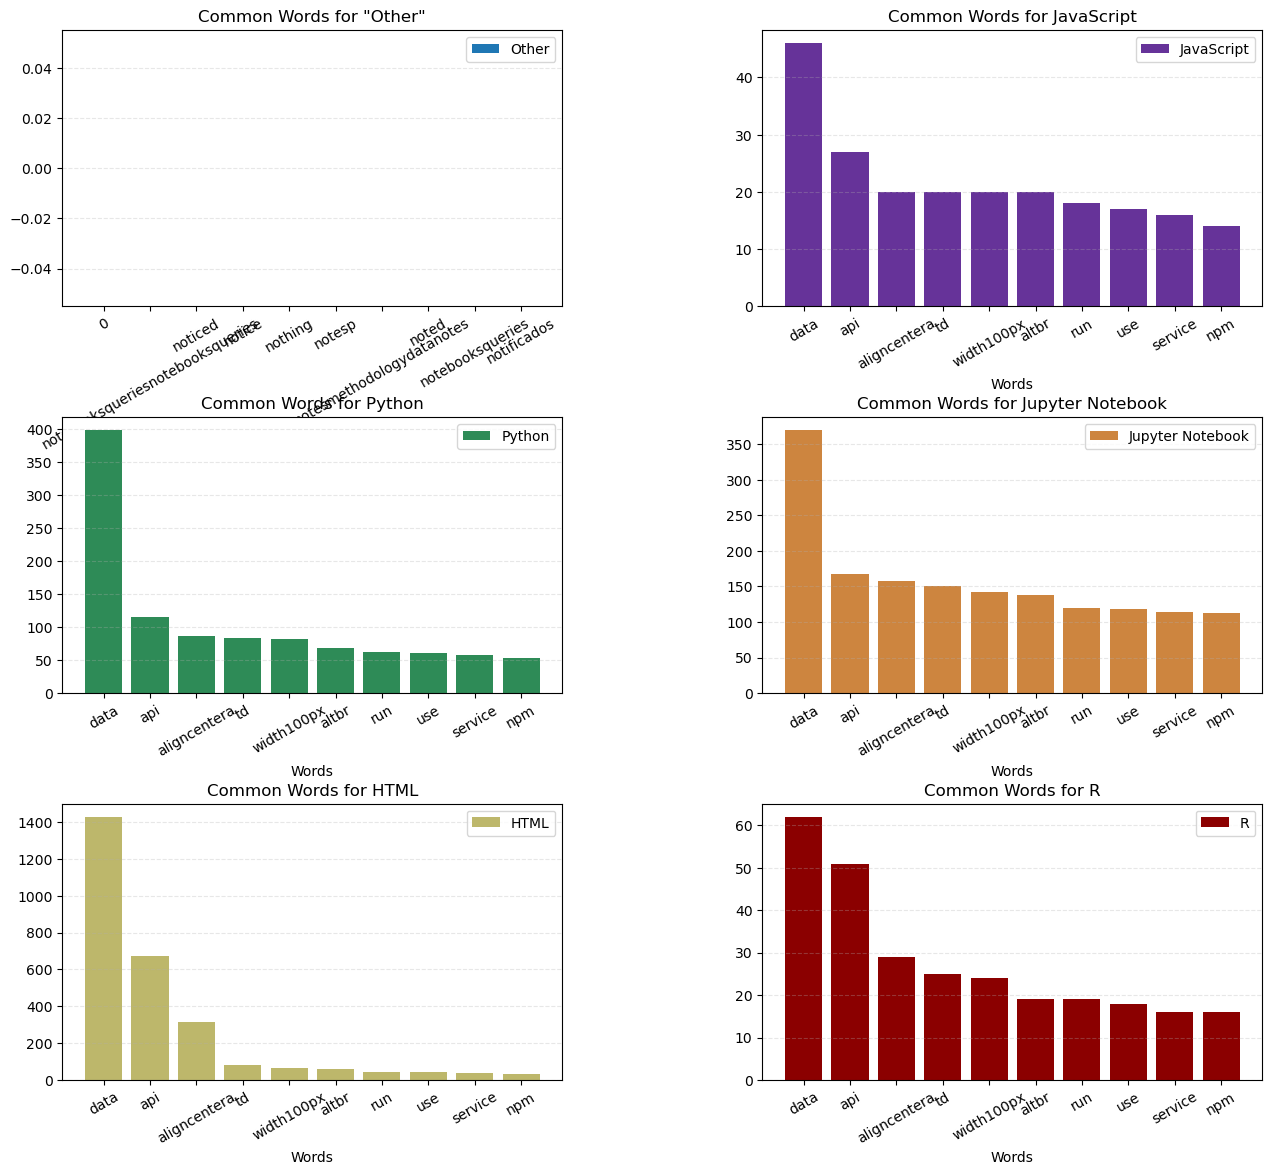

In [10]:
#question 2 visualizations
ex.explore_plots(train)

**Takeaway**  
* The p-value is not lower than the alpha
* The average time to conflict for Africa and the Middle East is not significantlly different than the average time to conflict in the dataset

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>What words have the highest Inverse Document Frequency (IDF)?</dt>
    </dl>
</div>

In [ ]:
#question 4 visualizations
ex.q4_plots(train)

**Takeaway**
* The p-value is less than alpha
* I can say with confidence that the average time to conflict for internationalized intrastate conflict is significantly shorter that the average time to conflict in the dataset
* The difference between means is 300 days or about 10 months!

<div class="alert alert-info">
    <header>
    <h2>Exploration Summary</h2>
    </header>
    <dl>
        <dd>- With the smaller size of the dataset, it was more difficult to identify drivers.</dd>
        <dd>- There is one data point around 13000 that skews the average where included. It is still possible to find relevance in the data.</dd>
        <dd>- The two drivers identified were internationalized intrastate conflicts and countries in the Asia region.</dd>
    </dl>
</div>

# Prep the data for modeling:

* encode columns to reduce the number of catagories:
    * `location` intiger 0-10 for top ten locations and other
    * `side_a` intiger 0-10 for top ten side_a's and other
    * `side_b` intiger 0-20 for top twenty side_b's and other
    * `start_date` intiger 0 or 1, 0 if before 2000 and 1 if after 2000
    * `time_to_conflict` 1= less than or equal to 30 days, 2= between 30 days and 1 year, 3= longer than a year
* Dummies were encoded for:
    * `location`, `side_a`, `side_b`, `type_of_conflict`, `region`, `start_date`, `time_to_conflict` and `incompatibility`
* Dropped columns:
    * `start_date2`, `territory_name`

In [ ]:
#prep the data for modeling
df=mod.model_prep()

In [ ]:
#splitting the data and giving baseline
train, val, test=tts(df, 'time_to_conflict')
mod.baseline(train)

In [ ]:
#results from modeling
train, val, test=tts(df, 'time_to_conflict')
mod.models(train, val)

In [ ]:
#running the test data through the model
mod.test(train, val, test)

<div class="alert alert-info">
    <header>
    <h2>Modeling Summary</h2>
    </header>
    <dl>
        <dd>- Logistic regression models were the only ones that performed above baseline.</dd>
        <dd>- The 'lbfgs' solver had a lower train accuracy and same validate accuracy as the 'liblinear' solver. Because the difference was lower, I used the 'lbfgs' solver for the test data.</dd>
        <dd>- The test data performed much higher than baseline. There were not a lot of rows in the test set. It should be re-evaluated over time.</dd>
    </dl>
    <header>
    <h2>Conclusion</h2>
    </header>
        <dl>
        <dd>- Predicting with such a small dataset is difficult.</dd>
        <dd>- Minor armed conflicts and wars happen over long periods of time and we are activly working for peace. We must do the best we can with the information we have.</dd>
        <dd>- Internationalized intrastate conflicts have a shorter time until the threshold of 25 casualties. The more parties involved may lead to quicker deaths.</dd>
    <header>
    <h2>Next Steps</h2>
    </header>
        <dd>- This dataset contains many features that can be used in different ways. Exploring with other features to include in modeling would be my next steps. Maybe changing the way features were intrepreted for modeling would yield a more consistent model. I would also explore conflicts with more internationalized conflict again and try to expose more insights.</dd>
    </dl>
</div>